In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
import scipy.stats as stats

from sklearn.model_selection import permutation_test_score

plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)

In [19]:
def analysis(col):
    temp = train[col].value_counts()
    temp = temp[temp > temp.iloc[0]//100].index
    #temp = train.index
    temp_df = train[train[col].isin(temp)]
    #temp_df = temp_df.sample(10000)
    p = temp_df.HasDetections.mean()
    q = 1-p
    copy = train.copy()
    p_1 = train.HasDetections.mean()
    q_1 = 1-p_1
    random_data = pd.Series(np.random.choice([1,0], len(temp_df),p=[p,q]), index = temp_df.index).rename('HasDetections')
    temp_df['random_data'] = random_data
    random_data_1 = pd.Series(np.random.choice([1,0], len(copy),p=[p_1,q_1]), index = copy.index).rename('HasDetections')
    copy['random_data'] = random_data_1
    
    #temp_df.groupby(col).HasDetections.mean().plot(kind = 'bar', figsize=(20,10))
    temp_df.groupby(col)[['HasDetections', 'random_data']].mean().plot(kind = 'bar', figsize=(20,10))
    plt.title('Percent of Has detections by {} (most of the catogaries)'.format(col))
    
    display(pd.DataFrame({'train_data': temp_df.groupby(col).HasDetections.mean(),
                         'random_data': temp_df.groupby(col).random_data.mean()}))
    return stats.ks_2samp(copy.groupby(col).HasDetections.mean(),
                copy.groupby(col).random_data.mean())




#stats.chi2_contingency([temp_df.groupby(col).HasDetections.mean(),
#                temp_df.groupby(col).random_data.mean()])


In [13]:
COLS = [
    'HasDetections',
    'AVProductStatesIdentifier','AVProductsInstalled', 'AVProductsEnabled'
]

In [4]:
train = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS)

In [5]:
train.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasDetections
0,53447.0,1.0,1.0,0
1,53447.0,1.0,1.0,0
2,53447.0,1.0,1.0,0
3,53447.0,1.0,1.0,1
4,53447.0,1.0,1.0,1


In [6]:
#General analysis

In [7]:
#1.1 AVProductStatesIdentifier

,train_data,random_data
AVProductStatesIdentifier,,
7945.0,0.348334,0.523886
23657.0,0.411926,0.524961
29199.0,0.489096,0.523848
41571.0,0.289548,0.520495
46413.0,0.493524,0.523317
47238.0,0.465580,0.523396
49480.0,0.397932,0.520836
51954.0,0.521178,0.523486
53447.0,0.556365,0.523218


Ks_2sampResult(statistic=0.2562651018294788, pvalue=0.0)

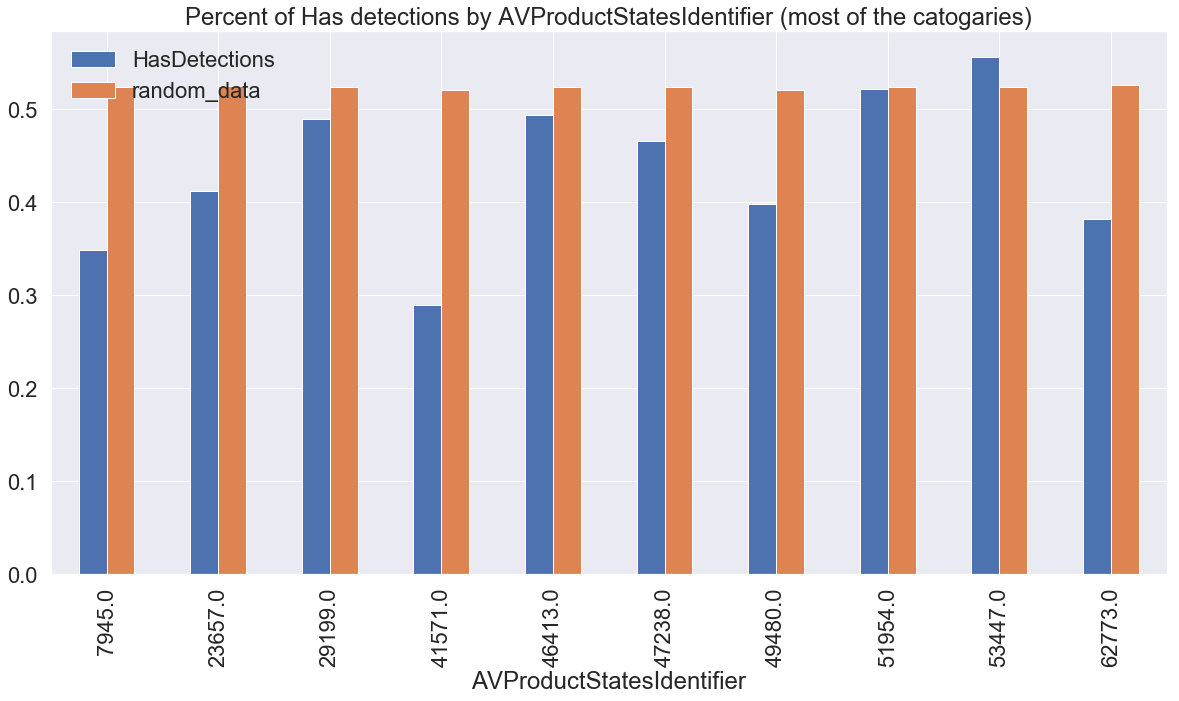

In [20]:
analysis(COLS[1])

In [21]:
# hypothesis: Different Antivirius product will have different performance over the virius detection

In [22]:
# hypothesis: Different Antivirius product installed will have different performance over the virius detection

,train_data,random_data
AVProductsInstalled,,
1.0,0.548581,0.500765
2.0,0.396906,0.500391
3.0,0.291596,0.500310


Ks_2sampResult(statistic=0.625, pvalue=0.04965436858665974)

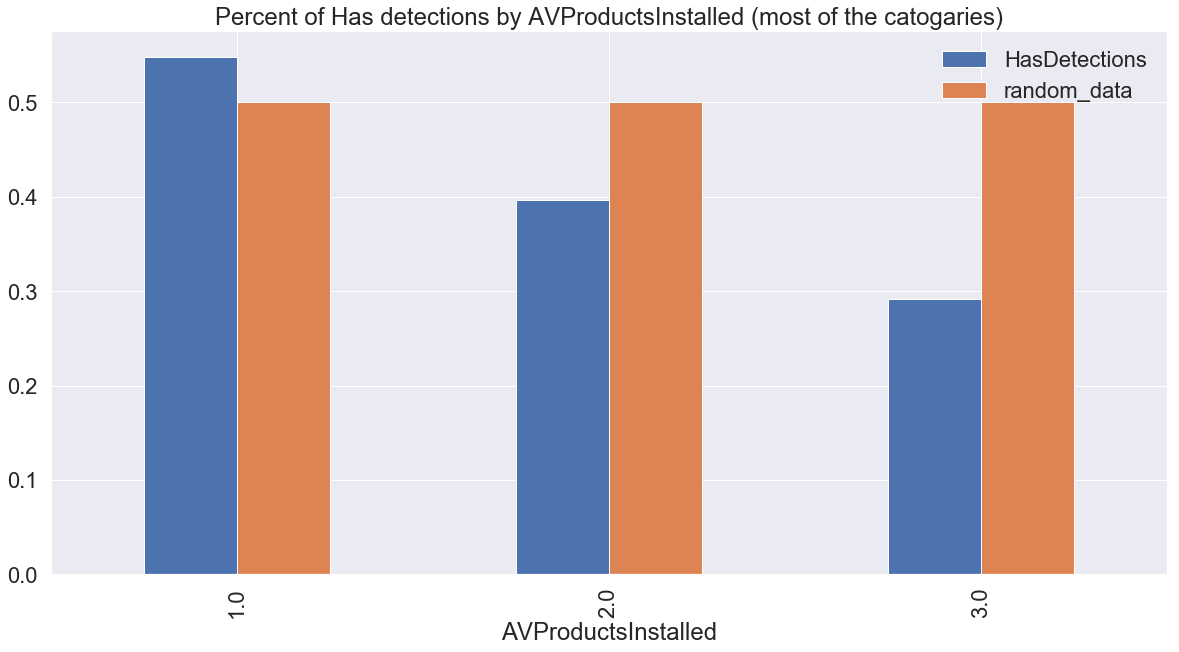

In [23]:
analysis(COLS[2])

In [24]:
# hypothesis: Different Antivirius product installed will have different performance over the virius detection

,train_data,random_data
AVProductsEnabled,,
1.0,0.504636,0.500633
2.0,0.336422,0.501616


Ks_2sampResult(statistic=0.8333333333333334, pvalue=0.012238153125878112)

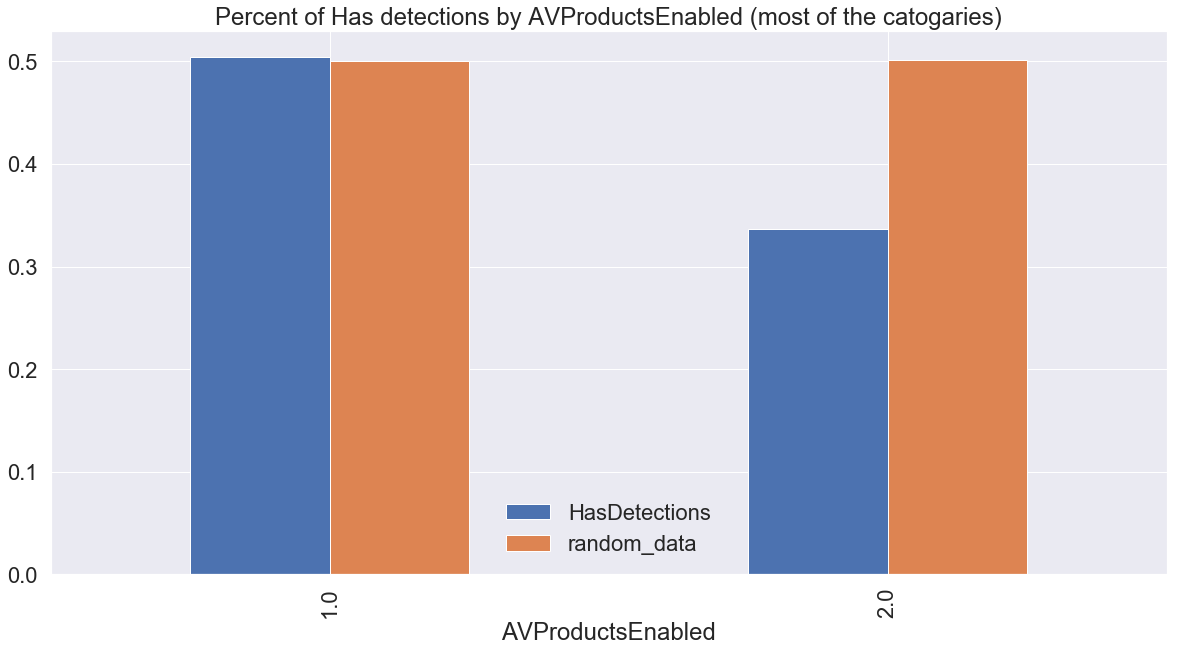

In [25]:
analysis(COLS[3])

In [29]:
# regression w/ onehot 

In [30]:
# regression w/ randomforest